<a href="https://colab.research.google.com/github/YenOjeda/Hipotesis/blob/main/proyecto_hipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-cloud-bigquery
!pip install pandas
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()
# Especifica el ID del proyecto
project_id = 'proyecto-hipotesis-403701'
client = bigquery.Client(project=project_id)
# Especifica la consulta SQL para obtener los datos
query = 'SELECT * FROM `proyecto-hipotesis-403701.track_in_competition.tabla_general`'
# Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas
df = client.query(query).to_dataframe()
# Imprime el DataFrame
print(df.head())

  track_id                 track_name_limpio artist_s_name_limpio  \
0  8597238  Run Rudolph Run   Single Version          Chuck Berry   
1  2052397                            Beggin                M  ne   
2  2226206                        SUPERMODEL                M  ne   
3  5624903             I WANNA BE YOUR SLAVE                M  ne   
4  6321372                     THE LONELIEST                M  ne   

   artist_count released_date  in_spotify_playlists  in_spotify_charts  \
0             1    1958-01-01                  8612                  0   
1             1    2017-12-08                  8559                  0   
2             1    2022-05-13                  2265                  0   
3             1    2021-03-19                  4873                  0   
4             1    2022-10-07                  1585                  5   

   stream_limpia  in_apple_playlists  in_apple_charts  ...  total_charts  \
0      245350949                 120               30  ...      

In [ ]:
from scipy.stats import wilcoxon
import numpy as np
# Ejemplo de dos grupos de datos ficticios
grupo_1_altos = df.loc[df['cat_valence'] == 'alto', 'stream_limpia'].astype(float)
grupo_2_bajos = df.loc[df['cat_valence'] == 'bajo', 'stream_limpia'].astype(float)
# Eliminar valores NaN de los grupos
grupo_1_altos = grupo_1_altos.dropna()
grupo_2_bajos = grupo_2_bajos.dropna()
# Verificar si hay suficientes datos después de eliminar NaN
if len(grupo_1_altos) < 3 or len(grupo_2_bajos) < 3:
    print('No hay suficientes datos después de eliminar NaN.')
else:
    # Imprimir las longitudes de los conjuntos de datos
    print(f'Longitud del grupo 1 para cat_valence alto: {len(grupo_1_altos)}')
    print(f'Longitud del grupo 2 para cat_valence bajo: {len(grupo_2_bajos)}')
    # Calcular el promedio del grupo_1_altos
    promedio_grupo_1_altos = grupo_1_altos.mean()
    print(f'Promedio del grupo 1 para cat_valence alto: {promedio_grupo_1_altos}')
    # Calcular el promedio del grupo_2_bajos
    promedio_grupo_2_bajos = grupo_2_bajos.mean()
    print(f'Promedio del grupo 2 para cat_valence bajo: {promedio_grupo_2_bajos}')
    # Verificar si ambos conjuntos tienen la misma longitud
    if len(grupo_1_altos) == len(grupo_2_bajos):
        # Aplicar el test de Wilcoxon a los grupos
        estadistico, p_valor = wilcoxon(grupo_1_altos, grupo_2_bajos, alternative='two-sided')
        # Imprimir los resultados del test de Wilcoxon
        print(f'Estadístico de prueba Wilcoxon: {estadistico}')
        print(f'Valor p: {p_valor}')
        # Interpretar los resultados
        nivel_significancia = 0.05
        if p_valor < nivel_significancia:
            print('Hay una diferencia significativa entre los grupos.')
    else:
        print('Los conjuntos de datos tienen longitudes diferentes. Revisa tus datos y asegúrate de que ambos grupos tengan la misma longitud.')

Longitud del grupo 1 para cat_valence alto: 241
Longitud del grupo 2 para cat_valence bajo: 701
Promedio del grupo 1 para cat_valence alto: 465796756.593361
Promedio del grupo 2 para cat_valence bajo: 531063679.38944364
Los conjuntos de datos tienen longitudes diferentes. Revisa tus datos y asegúrate de que ambos grupos tengan la misma longitud.


In [ ]:
from scipy.stats import wilcoxon
import numpy as np
# Igualar las longitudes tomando una muestra aleatoria del grupo más grande
min_length = min(len(grupo_1_altos), len(grupo_2_bajos))
grupo_1_altos = grupo_1_altos.sample(min_length, random_state=42)
grupo_2_bajos = grupo_2_bajos.sample(min_length, random_state=42)
# Aplicar el test de Wilcoxon a los grupos
estadistico, p_valor = wilcoxon(grupo_1_altos, grupo_2_bajos, alternative='two-sided')
# Imprimir los resultados del test de Wilcoxon
print(f'Estadístico de prueba Wilcoxon: {estadistico}')
print(f'Valor p: {p_valor}')
# Interpretar los resultados
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print('Hay una diferencia significativa entre los grupos.')
else:
    print('No hay evidencia suficiente para afirmar que hay una diferencia significativa entre los grupos.')

Estadístico de prueba Wilcoxon: 11387.0
Valor p: 0.0032015116842556346
Hay una diferencia significativa entre los grupos.


In [ ]:
from scipy.stats import wilcoxon
import numpy as np
# Ejemplo de dos grupos de datos ficticios
grupo_1_altos = df.loc[df['cat_dance'] == 'alto', 'stream_limpia'].astype(float)
grupo_2_bajos = df.loc[df['cat_dance'] == 'bajo', 'stream_limpia'].astype(float)
# Eliminar valores NaN de los grupos
grupo_1_altos = grupo_1_altos.dropna()
grupo_2_bajos = grupo_2_bajos.dropna()
# Verificar si hay suficientes datos después de eliminar NaN
if len(grupo_1_altos) < 3 or len(grupo_2_bajos) < 3:
    print('No hay suficientes datos después de eliminar NaN.')
else:
    # Imprimir las longitudes de los conjuntos de datos
    print(f'Longitud del grupo 1 para cat_dance alto: {len(grupo_1_altos)}')
    print(f'Longitud del grupo 2 para cat_dance bajo: {len(grupo_2_bajos)}')
    # Calcular el promedio del grupo_1_altos
    promedio_grupo_1_altos = grupo_1_altos.mean()
    print(f'Promedio del grupo 1 para cat_dance alto: {promedio_grupo_1_altos}')
    # Calcular el promedio del grupo_2_bajos
    promedio_grupo_2_bajos = grupo_2_bajos.mean()
    print(f'Promedio del grupo 2 para cat_dance bajo: {promedio_grupo_2_bajos}')
    # Verificar si ambos conjuntos tienen la misma longitud
    if len(grupo_1_altos) == len(grupo_2_bajos):
        # Aplicar el test de Wilcoxon a los grupos
        estadistico, p_valor = wilcoxon(grupo_1_altos, grupo_2_bajos, alternative='two-sided')
        # Imprimir los resultados del test de Wilcoxon
        print(f'Estadístico de prueba Wilcoxon: {estadistico}')
        print(f'Valor p: {p_valor}')
        # Interpretar los resultados
        nivel_significancia = 0.05
        if p_valor < nivel_significancia:
            print('Hay una diferencia significativa entre los grupos.')
    else:
        print('Los conjuntos de datos tienen longitudes diferentes. Revisa tus datos y asegúrate de que ambos grupos tengan la misma longitud.')

Longitud del grupo 1 para cat_dance alto: 255
Longitud del grupo 2 para cat_dance bajo: 687
Promedio del grupo 1 para cat_dance alto: 423495321.83137256
Promedio del grupo 2 para cat_dance bajo: 548095124.4890829
Los conjuntos de datos tienen longitudes diferentes. Revisa tus datos y asegúrate de que ambos grupos tengan la misma longitud.


In [ ]:
from scipy.stats import wilcoxon
import numpy as np
# Igualar las longitudes tomando una muestra aleatoria del grupo más grande
min_length = min(len(grupo_1_altos), len(grupo_2_bajos))
grupo_1_altos = grupo_1_altos.sample(min_length, random_state=42)
grupo_2_bajos = grupo_2_bajos.sample(min_length, random_state=42)
# Aplicar el test de Wilcoxon a los grupos
estadistico, p_valor = wilcoxon(grupo_1_altos, grupo_2_bajos, alternative='two-sided')
# Imprimir los resultados del test de Wilcoxon
print(f'Estadístico de prueba Wilcoxon: {estadistico}')
print(f'Valor p: {p_valor}')
# Interpretar los resultados
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print('Hay una diferencia significativa entre los grupos.')
else:
    print('No hay evidencia suficiente para afirmar que hay una diferencia significativa entre los grupos.')

Estadístico de prueba Wilcoxon: 13677.0
Valor p: 0.02497250021345304
Hay una diferencia significativa entre los grupos.


In [ ]:
from scipy.stats import wilcoxon
import numpy as np
# Ejemplo de dos grupos de datos ficticios
grupo_1_altos = df.loc[df['cat_energy'] == 'alto', 'stream_limpia'].astype(float)
grupo_2_bajos = df.loc[df['cat_energy'] == 'bajo', 'stream_limpia'].astype(float)
# Eliminar valores NaN de los grupos
grupo_1_altos = grupo_1_altos.dropna()
grupo_2_bajos = grupo_2_bajos.dropna()
# Verificar si hay suficientes datos después de eliminar NaN
if len(grupo_1_altos) < 3 or len(grupo_2_bajos) < 3:
    print('No hay suficientes datos después de eliminar NaN.')
else:
    # Imprimir las longitudes de los conjuntos de datos
    print(f'Longitud del grupo 1 para cat_energy alto: {len(grupo_1_altos)}')
    print(f'Longitud del grupo 2 para cat_energy bajo: {len(grupo_2_bajos)}')
    # Calcular el promedio del grupo_1_altos
    promedio_grupo_1_altos = grupo_1_altos.mean()
    print(f'Promedio del grupo 1 para cat_energy alto: {promedio_grupo_1_altos}')
    # Calcular el promedio del grupo_2_bajos
    promedio_grupo_2_bajos = grupo_2_bajos.mean()
    print(f'Promedio del grupo 2 para cat_energy bajo: {promedio_grupo_2_bajos}')
    # Verificar si ambos conjuntos tienen la misma longitud
    if len(grupo_1_altos) == len(grupo_2_bajos):
        # Aplicar el test de Wilcoxon a los grupos
        estadistico, p_valor = wilcoxon(grupo_1_altos, grupo_2_bajos, alternative='two-sided')
        # Imprimir los resultados del test de Wilcoxon
        print(f'Estadístico de prueba Wilcoxon: {estadistico}')
        print(f'Valor p: {p_valor}')
        # Interpretar los resultados
        nivel_significancia = 0.05
        if p_valor < nivel_significancia:
            print('Hay una diferencia significativa entre los grupos.')
    else:
        print('Los conjuntos de datos tienen longitudes diferentes. Revisa tus datos y asegúrate de que ambos grupos tengan la misma longitud.')

Longitud del grupo 1 para cat_energy alto: 242
Longitud del grupo 2 para cat_energy bajo: 700
Promedio del grupo 1 para cat_energy alto: 500140884.59917355
Promedio del grupo 2 para cat_energy bajo: 519283662.1685714
Los conjuntos de datos tienen longitudes diferentes. Revisa tus datos y asegúrate de que ambos grupos tengan la misma longitud.


In [ ]:
from scipy.stats import wilcoxon
import numpy as np
# Igualar las longitudes tomando una muestra aleatoria del grupo más grande
min_length = min(len(grupo_1_altos), len(grupo_2_bajos))
grupo_1_altos = grupo_1_altos.sample(min_length, random_state=42)
grupo_2_bajos = grupo_2_bajos.sample(min_length, random_state=42)
# Aplicar el test de Wilcoxon a los grupos
estadistico, p_valor = wilcoxon(grupo_1_altos, grupo_2_bajos, alternative='two-sided')
# Imprimir los resultados del test de Wilcoxon
print(f'Estadístico de prueba Wilcoxon: {estadistico}')
print(f'Valor p: {p_valor}')
# Interpretar los resultados
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print('Hay una diferencia significativa entre los grupos.')
else:
    print('No hay evidencia suficiente para afirmar que hay una diferencia significativa entre los grupos.')

Estadístico de prueba Wilcoxon: 14274.0
Valor p: 0.6949421607515598
No hay evidencia suficiente para afirmar que hay una diferencia significativa entre los grupos.


In [ ]:
from scipy.stats import wilcoxon
import numpy as np
# Ejemplo de dos grupos de datos ficticios
grupo_1_altos = df.loc[df['cat_acousticness'] == 'alto', 'stream_limpia'].astype(float)
grupo_2_bajos = df.loc[df['cat_acousticness'] == 'bajo', 'stream_limpia'].astype(float)
# Eliminar valores NaN de los grupos
grupo_1_altos = grupo_1_altos.dropna()
grupo_2_bajos = grupo_2_bajos.dropna()
# Verificar si hay suficientes datos después de eliminar NaN
if len(grupo_1_altos) < 3 or len(grupo_2_bajos) < 3:
    print('No hay suficientes datos después de eliminar NaN.')
else:
    # Imprimir las longitudes de los conjuntos de datos
    print(f'Longitud del grupo 1 para cat_acousticness alto: {len(grupo_1_altos)}')
    print(f'Longitud del grupo 2 para cat_acousticness bajo: {len(grupo_2_bajos)}')
    # Calcular el promedio del grupo_1_altos
    promedio_grupo_1_altos = grupo_1_altos.mean()
    print(f'Promedio del grupo 1 para cat_acousticness alto: {promedio_grupo_1_altos}')
    # Calcular el promedio del grupo_2_bajos
    promedio_grupo_2_bajos = grupo_2_bajos.mean()
    print(f'Promedio del grupo 2 para cat_acousticness bajo: {promedio_grupo_2_bajos}')
    # Verificar si ambos conjuntos tienen la misma longitud
    if len(grupo_1_altos) == len(grupo_2_bajos):
        # Aplicar el test de Wilcoxon a los grupos
        estadistico, p_valor = wilcoxon(grupo_1_altos, grupo_2_bajos, alternative='two-sided')
        # Imprimir los resultados del test de Wilcoxon
        print(f'Estadístico de prueba Wilcoxon: {estadistico}')
        print(f'Valor p: {p_valor}')
        # Interpretar los resultados
        nivel_significancia = 0.05
        if p_valor < nivel_significancia:
            print('Hay una diferencia significativa entre los grupos.')
    else:
        print('Los conjuntos de datos tienen longitudes diferentes. Revisa tus datos y asegúrate de que ambos grupos tengan la misma longitud.')

Longitud del grupo 1 para cat_acousticness alto: 240
Longitud del grupo 2 para cat_acousticness bajo: 702
Promedio del grupo 1 para cat_acousticness alto: 537323432.4625
Promedio del grupo 2 para cat_acousticness bajo: 506517142.16524214
Los conjuntos de datos tienen longitudes diferentes. Revisa tus datos y asegúrate de que ambos grupos tengan la misma longitud.


In [ ]:
from scipy.stats import wilcoxon
import numpy as np
# Igualar las longitudes tomando una muestra aleatoria del grupo más grande
min_length = min(len(grupo_1_altos), len(grupo_2_bajos))
grupo_1_altos = grupo_1_altos.sample(min_length, random_state=42)
grupo_2_bajos = grupo_2_bajos.sample(min_length, random_state=42)
# Aplicar el test de Wilcoxon a los grupos
estadistico, p_valor = wilcoxon(grupo_1_altos, grupo_2_bajos, alternative='two-sided')
# Imprimir los resultados del test de Wilcoxon
print(f'Estadístico de prueba Wilcoxon: {estadistico}')
print(f'Valor p: {p_valor}')
# Interpretar los resultados
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print('Hay una diferencia significativa entre los grupos.')
else:
    print('No hay evidencia suficiente para afirmar que hay una diferencia significativa entre los grupos.')

Estadístico de prueba Wilcoxon: 14218.0
Valor p: 0.8221598317636875
No hay evidencia suficiente para afirmar que hay una diferencia significativa entre los grupos.


In [ ]:
from scipy.stats import wilcoxon
import numpy as np
# Ejemplo de dos grupos de datos ficticios
grupo_1_altos = df.loc[df['cat_instrumentalness'] == 'alto', 'stream_limpia'].astype(float)
grupo_2_bajos = df.loc[df['cat_instrumentalness'] == 'bajo', 'stream_limpia'].astype(float)
# Eliminar valores NaN de los grupos
grupo_1_altos = grupo_1_altos.dropna()
grupo_2_bajos = grupo_2_bajos.dropna()
# Verificar si hay suficientes datos después de eliminar NaN
if len(grupo_1_altos) < 3 or len(grupo_2_bajos) < 3:
    print('No hay suficientes datos después de eliminar NaN.')
else:
    # Imprimir las longitudes de los conjuntos de datos
    print(f'Longitud del grupo 1 para cat_instrumentalness alto: {len(grupo_1_altos)}')
    print(f'Longitud del grupo 2 para cat_instrumentalness bajo: {len(grupo_2_bajos)}')
    # Calcular el promedio del grupo_1_altos
    promedio_grupo_1_altos = grupo_1_altos.mean()
    print(f'Promedio del grupo 1 para cat_instrumentalness alto: {promedio_grupo_1_altos}')
    # Calcular el promedio del grupo_2_bajos
    promedio_grupo_2_bajos = grupo_2_bajos.mean()
    print(f'Promedio del grupo 2 para cat_instrumentalness bajo: {promedio_grupo_2_bajos}')
    # Verificar si ambos conjuntos tienen la misma longitud
    if len(grupo_1_altos) == len(grupo_2_bajos):
        # Aplicar el test de Wilcoxon a los grupos
        estadistico, p_valor = wilcoxon(grupo_1_altos, grupo_2_bajos, alternative='two-sided')
        # Imprimir los resultados del test de Wilcoxon
        print(f'Estadístico de prueba Wilcoxon: {estadistico}')
        print(f'Valor p: {p_valor}')
        # Interpretar los resultados
        nivel_significancia = 0.05
        if p_valor < nivel_significancia:
            print('Hay una diferencia significativa entre los grupos.')
    else:
        print('Los conjuntos de datos tienen longitudes diferentes. Revisa tus datos y asegúrate de que ambos grupos tengan la misma longitud.')

Longitud del grupo 1 para cat_instrumentalness alto: 85
Longitud del grupo 2 para cat_instrumentalness bajo: 857
Promedio del grupo 1 para cat_instrumentalness alto: 445746990.9882353
Promedio del grupo 2 para cat_instrumentalness bajo: 521171719.20303386
Los conjuntos de datos tienen longitudes diferentes. Revisa tus datos y asegúrate de que ambos grupos tengan la misma longitud.


In [ ]:
from scipy.stats import wilcoxon
import numpy as np
# Igualar las longitudes tomando una muestra aleatoria del grupo más grande
min_length = min(len(grupo_1_altos), len(grupo_2_bajos))
grupo_1_altos = grupo_1_altos.sample(min_length, random_state=42)
grupo_2_bajos = grupo_2_bajos.sample(min_length, random_state=42)
# Aplicar el test de Wilcoxon a los grupos
estadistico, p_valor = wilcoxon(grupo_1_altos, grupo_2_bajos, alternative='two-sided')
# Imprimir los resultados del test de Wilcoxon
print(f'Estadístico de prueba Wilcoxon: {estadistico}')
print(f'Valor p: {p_valor}')
# Interpretar los resultados
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print('Hay una diferencia significativa entre los grupos.')
else:
    print('No hay evidencia suficiente para afirmar que hay una diferencia significativa entre los grupos.')

Estadístico de prueba Wilcoxon: 1418.0
Valor p: 0.07276020601437659
No hay evidencia suficiente para afirmar que hay una diferencia significativa entre los grupos.


In [ ]:
from scipy.stats import wilcoxon
import numpy as np
# Ejemplo de dos grupos de datos ficticios
grupo_1_altos = df.loc[df['cat_liveness'] == 'alto', 'stream_limpia'].astype(float)
grupo_2_bajos = df.loc[df['cat_liveness'] == 'bajo', 'stream_limpia'].astype(float)
# Eliminar valores NaN de los grupos
grupo_1_altos = grupo_1_altos.dropna()
grupo_2_bajos = grupo_2_bajos.dropna()
# Verificar si hay suficientes datos después de eliminar NaN
if len(grupo_1_altos) < 3 or len(grupo_2_bajos) < 3:
    print('No hay suficientes datos después de eliminar NaN.')
else:
    # Imprimir las longitudes de los conjuntos de datos
    print(f'Longitud del grupo 1 para cat_liveness alto: {len(grupo_1_altos)}')
    print(f'Longitud del grupo 2 para cat_liveness bajo: {len(grupo_2_bajos)}')
    # Calcular el promedio del grupo_1_altos
    promedio_grupo_1_altos = grupo_1_altos.mean()
    print(f'Promedio del grupo 1 para cat_liveness alto: {promedio_grupo_1_altos}')
    # Calcular el promedio del grupo_2_bajos
    promedio_grupo_2_bajos = grupo_2_bajos.mean()
    print(f'Promedio del grupo 2 para cat_liveness bajo: {promedio_grupo_2_bajos}')
    # Verificar si ambos conjuntos tienen la misma longitud
    if len(grupo_1_altos) == len(grupo_2_bajos):
        # Aplicar el test de Wilcoxon a los grupos
        estadistico, p_valor = wilcoxon(grupo_1_altos, grupo_2_bajos, alternative='two-sided')
        # Imprimir los resultados del test de Wilcoxon
        print(f'Estadístico de prueba Wilcoxon: {estadistico}')
        print(f'Valor p: {p_valor}')
        # Interpretar los resultados
        nivel_significancia = 0.05
        if p_valor < nivel_significancia:
            print('Hay una diferencia significativa entre los grupos.')
    else:
        print('Los conjuntos de datos tienen longitudes diferentes. Revisa tus datos y asegúrate de que ambos grupos tengan la misma longitud.')

Longitud del grupo 1 para cat_liveness alto: 247
Longitud del grupo 2 para cat_liveness bajo: 695
Promedio del grupo 1 para cat_liveness alto: 498079313.74898785
Promedio del grupo 2 para cat_liveness bajo: 520154053.37410074
Los conjuntos de datos tienen longitudes diferentes. Revisa tus datos y asegúrate de que ambos grupos tengan la misma longitud.


In [ ]:
from scipy.stats import wilcoxon
import numpy as np
# Igualar las longitudes tomando una muestra aleatoria del grupo más grande
min_length = min(len(grupo_1_altos), len(grupo_2_bajos))
grupo_1_altos = grupo_1_altos.sample(min_length, random_state=42)
grupo_2_bajos = grupo_2_bajos.sample(min_length, random_state=42)
# Aplicar el test de Wilcoxon a los grupos
estadistico, p_valor = wilcoxon(grupo_1_altos, grupo_2_bajos, alternative='two-sided')
# Imprimir los resultados del test de Wilcoxon
print(f'Estadístico de prueba Wilcoxon: {estadistico}')
print(f'Valor p: {p_valor}')
# Interpretar los resultados
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print('Hay una diferencia significativa entre los grupos.')
else:
    print('No hay evidencia suficiente para afirmar que hay una diferencia significativa entre los grupos.')

Estadístico de prueba Wilcoxon: 13416.0
Valor p: 0.09129750686037158
No hay evidencia suficiente para afirmar que hay una diferencia significativa entre los grupos.


In [ ]:
from scipy.stats import wilcoxon
import numpy as np
# Ejemplo de dos grupos de datos ficticios
grupo_1_altos = df.loc[df['cat_speechiness'] == 'alto', 'stream_limpia'].astype(float)
grupo_2_bajos = df.loc[df['cat_speechiness'] == 'bajo', 'stream_limpia'].astype(float)
# Eliminar valores NaN de los grupos
grupo_1_altos = grupo_1_altos.dropna()
grupo_2_bajos = grupo_2_bajos.dropna()
# Verificar si hay suficientes datos después de eliminar NaN
if len(grupo_1_altos) < 3 or len(grupo_2_bajos) < 3:
    print('No hay suficientes datos después de eliminar NaN.')
else:
    # Imprimir las longitudes de los conjuntos de datos
    print(f'Longitud del grupo 1 para cat_speechiness alto: {len(grupo_1_altos)}')
    print(f'Longitud del grupo 2 para cat_speechiness bajo: {len(grupo_2_bajos)}')
    # Calcular el promedio del grupo_1_altos
    promedio_grupo_1_altos = grupo_1_altos.mean()
    print(f'Promedio del grupo 1 para cat_speechiness alto: {promedio_grupo_1_altos}')
    # Calcular el promedio del grupo_2_bajos
    promedio_grupo_2_bajos = grupo_2_bajos.mean()
    print(f'Promedio del grupo 2 para cat_speechiness bajo: {promedio_grupo_2_bajos}')
    # Verificar si ambos conjuntos tienen la misma longitud
    if len(grupo_1_altos) == len(grupo_2_bajos):
        # Aplicar el test de Wilcoxon a los grupos
        estadistico, p_valor = wilcoxon(grupo_1_altos, grupo_2_bajos, alternative='two-sided')
        # Imprimir los resultados del test de Wilcoxon
        print(f'Estadístico de prueba Wilcoxon: {estadistico}')
        print(f'Valor p: {p_valor}')
        # Interpretar los resultados
        nivel_significancia = 0.05
        if p_valor < nivel_significancia:
            print('Hay una diferencia significativa entre los grupos.')
    else:
        print('Los conjuntos de datos tienen longitudes diferentes. Revisa tus datos y asegúrate de que ambos grupos tengan la misma longitud.')

Longitud del grupo 1 para cat_speechiness alto: 255
Longitud del grupo 2 para cat_speechiness bajo: 687
Promedio del grupo 1 para cat_speechiness alto: 424351822.1960784
Promedio del grupo 2 para cat_speechiness bajo: 547777209.5065502
Los conjuntos de datos tienen longitudes diferentes. Revisa tus datos y asegúrate de que ambos grupos tengan la misma longitud.


In [ ]:
from scipy.stats import wilcoxon
import numpy as np
# Igualar las longitudes tomando una muestra aleatoria del grupo más grande
min_length = min(len(grupo_1_altos), len(grupo_2_bajos))
grupo_1_altos = grupo_1_altos.sample(min_length, random_state=42)
grupo_2_bajos = grupo_2_bajos.sample(min_length, random_state=42)
# Aplicar el test de Wilcoxon a los grupos
estadistico, p_valor = wilcoxon(grupo_1_altos, grupo_2_bajos, alternative='two-sided')
# Imprimir los resultados del test de Wilcoxon
print(f'Estadístico de prueba Wilcoxon: {estadistico}')
print(f'Valor p: {p_valor}')
# Interpretar los resultados
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print('Hay una diferencia significativa entre los grupos.')
else:
    print('No hay evidencia suficiente para afirmar que hay una diferencia significativa entre los grupos.')

Estadístico de prueba Wilcoxon: 13523.0
Valor p: 0.017670425022928885
Hay una diferencia significativa entre los grupos.


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
# Suponiendo que 'df' es tu DataFrame original
df_mann = df[['stream_limpia', 'cat_streams', 'cat_dance', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']].copy()
 #Convertir 'cat_dance' a valores de cadena
df_mann['cat_dance'] = df_mann['cat_dance'].astype(str)
df_mann['stream_limpia']=df_mann['stream_limpia'].astype("float")
# Separa las muestras en "alto stream" y "bajo stream" según la columna 'categoria'
alto_stream = df_mann[df_mann['cat_dance'] == 'alto']['stream_limpia']
bajo_stream = df_mann[df_mann['cat_dance'] == 'bajo']['stream_limpia']
# Realiza la prueba de Mann-Whitney
resultado_mannwhitneyu = mannwhitneyu(alto_stream, bajo_stream)
# Imprime el resultado
print("Estadística de prueba U:", resultado_mannwhitneyu.statistic)
print("Valor p:", resultado_mannwhitneyu.pvalue)
# Interpretación del resultado
if resultado_mannwhitneyu.pvalue < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Las muestras son diferentes.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula. Las muestras son similares.")

Estadística de prueba U: 78667.0
Valor p: 0.016152999609606006
Hay evidencia estadística para rechazar la hipótesis nula. Las muestras son diferentes.


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
# Suponiendo que 'df' es tu DataFrame original
df_mann = df[['stream_limpia', 'cat_streams', 'cat_dance', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']].copy()
 #Convertir 'cat_valence' a valores de cadena
df_mann['cat_valence'] = df_mann['cat_valence'].astype(str)
df_mann['stream_limpia']=df_mann['stream_limpia'].astype("float")
# Separa las muestras en "alto stream" y "bajo stream" según la columna 'categoria'
alto_stream = df_mann[df_mann['cat_valence'] == 'alto']['stream_limpia']
bajo_stream = df_mann[df_mann['cat_valence'] == 'bajo']['stream_limpia']
# Realiza la prueba de Mann-Whitney
resultado_mannwhitneyu = mannwhitneyu(alto_stream, bajo_stream)
# Imprime el resultado
print("Estadística de prueba U:", resultado_mannwhitneyu.statistic)
print("Valor p:", resultado_mannwhitneyu.pvalue)
# Interpretación del resultado
if resultado_mannwhitneyu.pvalue < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Las muestras son diferentes.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula. Las muestras son similares.")

Estadística de prueba U: 80204.5
Valor p: 0.24172851285964114
No hay suficiente evidencia estadística para rechazar la hipótesis nula. Las muestras son similares.


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
# Suponiendo que 'df' es tu DataFrame original
df_mann = df[['stream_limpia', 'cat_streams', 'cat_dance', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']].copy()
 #Convertir 'cat_energy' a valores de cadena
df_mann['cat_energy'] = df_mann['cat_energy'].astype(str)
df_mann['stream_limpia']=df_mann['stream_limpia'].astype("float")
# Separa las muestras en "alto stream" y "bajo stream" según la columna 'categoria'
alto_stream = df_mann[df_mann['cat_energy'] == 'alto']['stream_limpia']
bajo_stream = df_mann[df_mann['cat_energy'] == 'bajo']['stream_limpia']
# Realiza la prueba de Mann-Whitney
resultado_mannwhitneyu = mannwhitneyu(alto_stream, bajo_stream)
# Imprime el resultado
print("Estadística de prueba U:", resultado_mannwhitneyu.statistic)
print("Valor p:", resultado_mannwhitneyu.pvalue)
# Interpretación del resultado
if resultado_mannwhitneyu.pvalue < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Las muestras son diferentes.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula. Las muestras son similares.")

Estadística de prueba U: 81710.0
Valor p: 0.4125790289707031
No hay suficiente evidencia estadística para rechazar la hipótesis nula. Las muestras son similares.


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
# Suponiendo que 'df' es tu DataFrame original
df_mann = df[['stream_limpia', 'cat_streams', 'cat_dance', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']].copy()
 #Convertir 'cat_energy' a valores de cadena
df_mann['cat_acousticness'] = df_mann['cat_acousticness'].astype(str)
df_mann['stream_limpia']=df_mann['stream_limpia'].astype("float")
# Separa las muestras en "alto stream" y "bajo stream" según la columna 'categoria'
alto_stream = df_mann[df_mann['cat_acousticness'] == 'alto']['stream_limpia']
bajo_stream = df_mann[df_mann['cat_acousticness'] == 'bajo']['stream_limpia']
# Realiza la prueba de Mann-Whitney
resultado_mannwhitneyu = mannwhitneyu(alto_stream, bajo_stream)
# Imprime el resultado
print("Estadística de prueba U:", resultado_mannwhitneyu.statistic)
print("Valor p:", resultado_mannwhitneyu.pvalue)
# Interpretación del resultado
if resultado_mannwhitneyu.pvalue < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Las muestras son diferentes.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula. Las muestras son similares.")

Estadística de prueba U: 83066.0
Valor p: 0.7470660746367352
No hay suficiente evidencia estadística para rechazar la hipótesis nula. Las muestras son similares.


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
# Suponiendo que 'df' es tu DataFrame original
df_mann = df[['stream_limpia', 'cat_streams', 'cat_dance', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']].copy()
 #Convertir 'cat_energy' a valores de cadena
df_mann['cat_instrumentalness'] = df_mann['cat_instrumentalness'].astype(str)
df_mann['stream_limpia']=df_mann['stream_limpia'].astype("float")
# Separa las muestras en "alto stream" y "bajo stream" según la columna 'categoria'
alto_stream = df_mann[df_mann['cat_instrumentalness'] == 'alto']['stream_limpia']
bajo_stream = df_mann[df_mann['cat_instrumentalness'] == 'bajo']['stream_limpia']
# Realiza la prueba de Mann-Whitney
resultado_mannwhitneyu = mannwhitneyu(alto_stream, bajo_stream)
# Imprime el resultado
print("Estadística de prueba U:", resultado_mannwhitneyu.statistic)
print("Valor p:", resultado_mannwhitneyu.pvalue)
# Interpretación del resultado
if resultado_mannwhitneyu.pvalue < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Las muestras son diferentes.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula. Las muestras son similares.")

Estadística de prueba U: 36240.0
Valor p: 0.9393643997784231
No hay suficiente evidencia estadística para rechazar la hipótesis nula. Las muestras son similares.


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
# Suponiendo que 'df' es tu DataFrame original
df_mann = df[['stream_limpia', 'cat_streams', 'cat_dance', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']].copy()
 #Convertir 'cat_liveness' a valores de cadena
df_mann['cat_liveness'] = df_mann['cat_liveness'].astype(str)
df_mann['stream_limpia']=df_mann['stream_limpia'].astype("float")
# Separa las muestras en "alto stream" y "bajo stream" según la columna 'categoria'
alto_stream = df_mann[df_mann['cat_liveness'] == 'alto']['stream_limpia']
bajo_stream = df_mann[df_mann['cat_liveness'] == 'bajo']['stream_limpia']
# Realiza la prueba de Mann-Whitney
resultado_mannwhitneyu = mannwhitneyu(alto_stream, bajo_stream)
# Imprime el resultado
print("Estadística de prueba U:", resultado_mannwhitneyu.statistic)
print("Valor p:", resultado_mannwhitneyu.pvalue)
# Interpretación del resultado
if resultado_mannwhitneyu.pvalue < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Las muestras son diferentes.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula. Las muestras son similares.")

Estadística de prueba U: 81831.0
Valor p: 0.2760050822734865
No hay suficiente evidencia estadística para rechazar la hipótesis nula. Las muestras son similares.


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
# Suponiendo que 'df' es tu DataFrame original
df_mann = df[['stream_limpia', 'cat_streams', 'cat_dance', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']].copy()
 #Convertir 'cat_speechiness' a valores de cadena
df_mann['cat_speechiness'] = df_mann['cat_speechiness'].astype(str)
df_mann['stream_limpia']=df_mann['stream_limpia'].astype("float")
# Separa las muestras en "alto stream" y "bajo stream" según la columna 'categoria'
alto_stream = df_mann[df_mann['cat_speechiness'] == 'alto']['stream_limpia']
bajo_stream = df_mann[df_mann['cat_speechiness'] == 'bajo']['stream_limpia']
# Realiza la prueba de Mann-Whitney
resultado_mannwhitneyu = mannwhitneyu(alto_stream, bajo_stream)
# Imprime el resultado
print("Estadística de prueba U:", resultado_mannwhitneyu.statistic)
print("Valor p:", resultado_mannwhitneyu.pvalue)
# Interpretación del resultado
if resultado_mannwhitneyu.pvalue < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Las muestras son diferentes.")
else:
    print("No hay suficiente evidencia estadística para rechazar la hipótesis nula. Las muestras son similares.")

Estadística de prueba U: 79206.0
Valor p: 0.02381067793217145
Hay evidencia estadística para rechazar la hipótesis nula. Las muestras son diferentes.


In [ ]:
import pandas as pd
import numpy as np
# Suponiendo que 'df' es tu DataFrame original
df_resumen = df[['stream_limpia', 'cat_dance', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']].copy()
# Convertir 'cat_dance' a valores de cadena
df_resumen['cat_dance'] = df_resumen['cat_dance'].astype(str)
df_resumen['stream_limpia']=df_resumen['stream_limpia'].astype("float")
# Agrupar por 'cat_valence' y 'cat_dance'
grupos_valence_dance = df_resumen.groupby(['cat_valence'])
# Calcular el promedio, desviación estándar, máximo, mínimo y conteo de 'stream_limpia' para cada grupo
promedio_stream = grupos_valence_dance['stream_limpia'].mean()
std_stream = grupos_valence_dance['stream_limpia'].std()
max_stream = grupos_valence_dance['stream_limpia'].max()
min_stream = grupos_valence_dance['stream_limpia'].min()
count_stream = grupos_valence_dance['stream_limpia'].count()
# Crear un nuevo DataFrame con los resultados
df_resumen1 = pd.DataFrame({
    'Cat_Valence': promedio_stream.index.get_level_values('cat_valence'),
    'Promedio_Stream': promedio_stream.values,
    'Desviacion_Estandar_Stream': std_stream.values,
    'Max_Stream': max_stream.values,
    'Min_Stream': min_stream.values,
    'Conteo_Stream': count_stream.values,
    })
df_resumen = df[['stream_limpia', 'cat_dance', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']]
# Agrupar por 'cat_valence' y 'cat_dance'
grupos_cat_dace = df_resumen.groupby(['cat_dance'])
# Convertir 'cat_dance' a valores de cadena
df_resumen['cat_dance'] = df_resumen['cat_dance'].astype(str)
df_resumen['stream_limpia']=df_resumen['stream_limpia'].astype("float")
# Agrupar por 'cat_valence' y 'cat_dance'
grupos_valence_dance = df_resumen.groupby(['cat_dance'])
# Calcular el promedio, desviación estándar, máximo, mínimo y conteo de 'stream_limpia' para cada grupo
promedio_stream = grupos_valence_dance['stream_limpia'].mean()
std_stream = grupos_valence_dance['stream_limpia'].std()
max_stream = grupos_valence_dance['stream_limpia'].max()
min_stream = grupos_valence_dance['stream_limpia'].min()
count_stream = grupos_valence_dance['stream_limpia'].count()
# Crear un nuevo DataFrame con los resultados
df_resumen2 = pd.DataFrame({
    'Cat_Dance': promedio_stream.index.get_level_values('cat_dance'),
    'Promedio_Stream': promedio_stream.values,
    'Desviacion_Estandar_Stream': std_stream.values,
    'Max_Stream': max_stream.values,
    'Min_Stream': min_stream.values,
    'Conteo_Stream': count_stream.values,
    })
df_resumen = df[['stream_limpia', 'cat_dance', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']]
# Agrupar por 'cat_valence' y 'cat_dance'
grupos_cat_energy = df_resumen.groupby(['cat_energy'])
# Convertir 'cat_dance' a valores de cadena
df_resumen['cat_energy'] = df_resumen['cat_energy'].astype(str)
df_resumen['stream_limpia']=df_resumen['stream_limpia'].astype("float")
# Agrupar por 'cat_valence' y 'cat_dance'
grupos_cat_valence = df_resumen.groupby(['cat_valence'])
# Calcular el promedio, desviación estándar, máximo, mínimo y conteo de 'stream_limpia' para cada grupo
promedio_stream = grupos_cat_energy['stream_limpia'].mean()
std_stream = grupos_cat_energy['stream_limpia'].std()
max_stream = grupos_cat_energy['stream_limpia'].max()
min_stream = grupos_cat_energy['stream_limpia'].min()
count_stream = grupos_cat_energy['stream_limpia'].count()
# Crear un nuevo DataFrame con los resultados
df_resumen3 = pd.DataFrame({
    'cat_energy': promedio_stream.index.get_level_values('cat_energy'),
    'Promedio_Stream': promedio_stream.values,
    'Desviacion_Estandar_Stream': std_stream.values,
    'Max_Stream': max_stream.values,
    'Min_Stream': min_stream.values,
    'Conteo_Stream': count_stream.values,
    })
df_resumen = df[['stream_limpia', 'cat_dance', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']]
# Agrupar por 'cat_valence' y 'cat_dance'
grupos_cat_acousticness = df_resumen.groupby(['cat_acousticness'])
# Convertir 'cat_dance' a valores de cadena
df_resumen['cat_acousticness'] = df_resumen['cat_acousticness'].astype(str)
df_resumen['stream_limpia']=df_resumen['stream_limpia'].astype("float")
# Agrupar por 'cat_valence' y 'cat_dance'
grupos_cat_valence = df_resumen.groupby(['cat_valence'])
# Calcular el promedio, desviación estándar, máximo, mínimo y conteo de 'stream_limpia' para cada grupo
promedio_stream = grupos_cat_acousticness['stream_limpia'].mean()
std_stream = grupos_cat_acousticness['stream_limpia'].std()
max_stream = grupos_cat_acousticness['stream_limpia'].max()
min_stream = grupos_cat_acousticness['stream_limpia'].min()
count_stream = grupos_cat_acousticness['stream_limpia'].count()
# Crear un nuevo DataFrame con los resultados
df_resumen4 = pd.DataFrame({
    'cat_acousticness': promedio_stream.index.get_level_values('cat_acousticness'),
    'Promedio_Stream': promedio_stream.values,
    'Desviacion_Estandar_Stream': std_stream.values,
    'Max_Stream': max_stream.values,
    'Min_Stream': min_stream.values,
    'Conteo_Stream': count_stream.values,
    })
df_resumen = df[['stream_limpia', 'cat_dance', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']]
# Agrupar por 'cat_valence' y 'cat_dance'
grupos_cat_acousticness = df_resumen.groupby(['cat_instrumentalness'])
# Convertir 'cat_dance' a valores de cadena
df_resumen['cat_instrumentalness'] = df_resumen['cat_instrumentalness'].astype(str)
df_resumen['stream_limpia']=df_resumen['stream_limpia'].astype("float")
# Agrupar por 'cat_valence' y 'cat_dance'
grupos_cat_instrumentalness = df_resumen.groupby(['cat_instrumentalness'])
# Calcular el promedio, desviación estándar, máximo, mínimo y conteo de 'stream_limpia' para cada grupo
promedio_stream = grupos_cat_instrumentalness['stream_limpia'].mean()
std_stream = grupos_cat_instrumentalness['stream_limpia'].std()
max_stream = grupos_cat_instrumentalness['stream_limpia'].max()
min_stream = grupos_cat_instrumentalness['stream_limpia'].min()
count_stream = grupos_cat_instrumentalness['stream_limpia'].count()
# Crear un nuevo DataFrame con los resultados
df_resumen5 = pd.DataFrame({
    'cat_instrumentalness': promedio_stream.index.get_level_values('cat_instrumentalness'),
    'Promedio_Stream': promedio_stream.values,
    'Desviacion_Estandar_Stream': std_stream.values,
    'Max_Stream': max_stream.values,
    'Min_Stream': min_stream.values,
    'Conteo_Stream': count_stream.values,
    })
df_resumen = df[['stream_limpia', 'cat_dance', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']]
# Agrupar por 'cat_valence' y 'cat_dance'
grupos_cat_acousticness = df_resumen.groupby(['cat_liveness'])
# Convertir 'cat_dance' a valores de cadena
df_resumen['cat_liveness'] = df_resumen['cat_liveness'].astype(str)
df_resumen['stream_limpia']=df_resumen['stream_limpia'].astype("float")
# Agrupar por 'cat_valence' y 'cat_dance'
grupos_cat_liveness = df_resumen.groupby(['cat_liveness'])
# Calcular el promedio, desviación estándar, máximo, mínimo y conteo de 'stream_limpia' para cada grupo
promedio_stream = grupos_cat_liveness['stream_limpia'].mean()
std_stream = grupos_cat_liveness['stream_limpia'].std()
max_stream = grupos_cat_liveness['stream_limpia'].max()
min_stream = grupos_cat_liveness['stream_limpia'].min()
count_stream = grupos_cat_liveness['stream_limpia'].count()
# Crear un nuevo DataFrame con los resultados
df_resumen6 = pd.DataFrame({
    'cat_liveness': promedio_stream.index.get_level_values('cat_liveness'),
    'Promedio_Stream': promedio_stream.values,
    'Desviacion_Estandar_Stream': std_stream.values,
    'Max_Stream': max_stream.values,
    'Min_Stream': min_stream.values,
    'Conteo_Stream': count_stream.values,
    })
df_resumen = df[['stream_limpia', 'cat_dance', 'cat_valence', 'cat_energy', 'cat_acousticness', 'cat_instrumentalness', 'cat_liveness', 'cat_speechiness']]
# Agrupar por 'cat_valence' y 'cat_dance'
grupos_cat_acousticness = df_resumen.groupby(['cat_speechiness'])
# Convertir 'cat_dance' a valores de cadena
df_resumen['cat_speechiness'] = df_resumen['cat_speechiness'].astype(str)
df_resumen['stream_limpia']=df_resumen['stream_limpia'].astype("float")
# Agrupar por 'cat_valence' y 'cat_dance'
grupos_cat_speechiness = df_resumen.groupby(['cat_speechiness'])
# Calcular el promedio, desviación estándar, máximo, mínimo y conteo de 'stream_limpia' para cada grupo
promedio_stream = grupos_cat_speechiness['stream_limpia'].mean()
std_stream = grupos_cat_speechiness['stream_limpia'].std()
max_stream = grupos_cat_speechiness['stream_limpia'].max()
min_stream = grupos_cat_speechiness['stream_limpia'].min()
count_stream = grupos_cat_speechiness['stream_limpia'].count()
# Crear un nuevo DataFrame con los resultados
df_resumen7 = pd.DataFrame({
    'cat_speechiness': promedio_stream.index.get_level_values('cat_speechiness'),
    'Promedio_Stream': promedio_stream.values,
    'Desviacion_Estandar_Stream': std_stream.values,
    'Max_Stream': max_stream.values,
    'Min_Stream': min_stream.values,
    'Conteo_Stream': count_stream.values,
    })
# Unir las dos tablas
df_final = pd.merge(df_resumen1, df_resumen2, how='outer')
df_final = pd.merge(df_final, df_resumen3, how='outer')
df_final = pd.merge(df_final, df_resumen4, how='outer')
df_final = pd.merge(df_final, df_resumen5, how='outer')
df_final = pd.merge(df_final, df_resumen6, how='outer')
df_final = pd.merge(df_final, df_resumen7, how='outer')
# Mostrar la tabla resumen
print(df_final)

   Cat_Valence  Promedio_Stream  Desviacion_Estandar_Stream    Max_Stream  \
0         alto     4.657968e+08                5.339377e+08  3.562544e+09   
1         bajo     5.310637e+08                5.807142e+08  3.703895e+09   
2          NaN     4.234953e+08                4.849870e+08  3.562544e+09   
3          NaN     5.480951e+08                5.946979e+08  3.703895e+09   
4          NaN     5.001409e+08                5.695861e+08  3.703895e+09   
5          NaN     5.192837e+08                5.698588e+08  3.562544e+09   
6          NaN     5.373234e+08                6.304437e+08  3.562544e+09   
7          NaN     5.065171e+08                5.474402e+08  3.703895e+09   
8          NaN     4.457470e+08                4.194150e+08  2.282771e+09   
9          NaN     5.211717e+08                5.820820e+08  3.703895e+09   
10         NaN     4.980793e+08                5.572034e+08  2.713922e+09   
11         NaN     5.201541e+08                5.741551e+08  3.703895e+09   

<ipython-input-12-7841e8f56157>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resumen['cat_dance'] = df_resumen['cat_dance'].astype(str)
<ipython-input-12-7841e8f56157>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resumen['stream_limpia']=df_resumen['stream_limpia'].astype("float")
<ipython-input-12-7841e8f56157>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
!pip install matplotlib numpy scikit-learn

Error Cuadrático Medio en el conjunto de prueba: 3.8953300820852294e+17


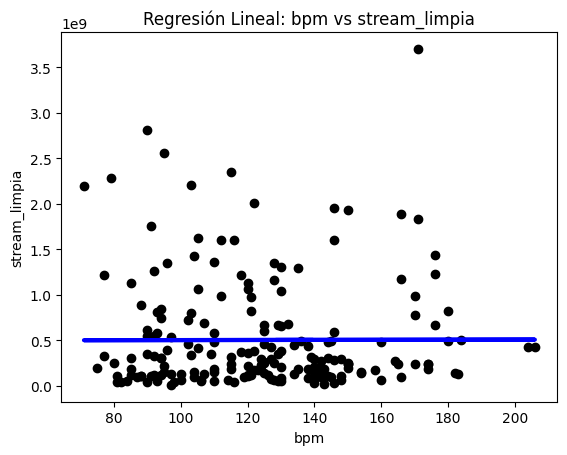

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Supongamos que df es tu DataFrame con los datos desde BigQuery
# Puedes cargar los datos de BigQuery a un DataFrame así:
# df = pd.read_gbq("SELECT * FROM tu_tabla", project_id="tu_proyecto")
# Seleccionar las variables de interés
df = df[['bpm', 'stream_limpia']]
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['bpm']]
y = df['stream_limpia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Crear un modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo
model.fit(X_train, y_train)
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio en el conjunto de prueba: {mse}")
# Visualizar los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('bpm')
plt.ylabel('stream_limpia')
plt.title('Regresión Lineal: bpm vs stream_limpia')
plt.show()

Error Cuadrático Medio en el conjunto de prueba: 17.262167667460645


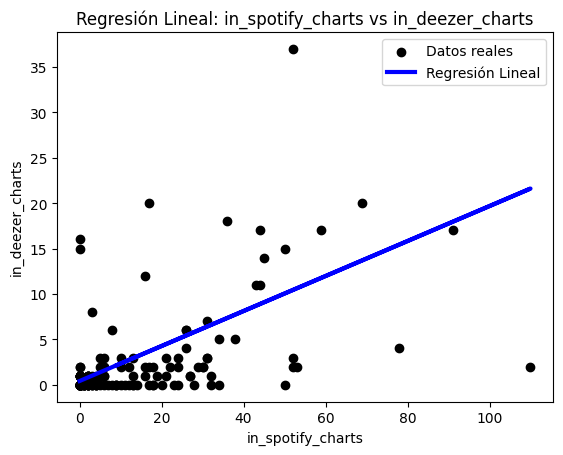

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supongamos que df es tu DataFrame con los datos
# Seleccionar las variables de interés
df =df[['in_spotify_charts', 'in_deezer_charts']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['in_spotify_charts']]
y = df['in_deezer_charts']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio en el conjunto de prueba: {mse}")

# Visualizar los resultados
plt.scatter(X_test, y_test, color='black', label='Datos reales')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regresión Lineal')
plt.xlabel('in_spotify_charts')
plt.ylabel('in_deezer_charts')
plt.title('Regresión Lineal: in_spotify_charts vs in_deezer_charts')
plt.legend()
plt.show()



Error Cuadrático Medio en el conjunto de prueba: 1.1396068628102856e+17


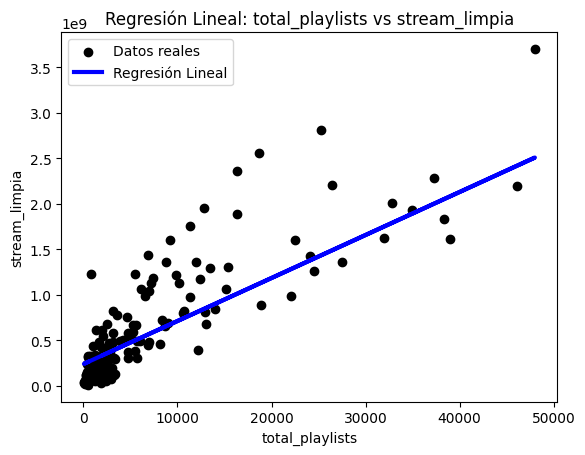

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supongamos que df es tu DataFrame con los datos
# Seleccionar las variables de interés
df =df[['total_playlists', 'stream_limpia']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['total_playlists']]
y = df['stream_limpia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio en el conjunto de prueba: {mse}")

# Visualizar los resultados
plt.scatter(X_test, y_test, color='black', label='Datos reales')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regresión Lineal')
plt.xlabel('total_playlists')
plt.ylabel('stream_limpia')
plt.title('Regresión Lineal: total_playlists vs stream_limpia')
plt.legend()
plt.show()
